# SIMPLE FLOWER CLASSIFIER MIT ADALINE (ADVANCED)

In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt

## Unterschied zu Adaline:
- Im Gegensatz zum vorherigen Adaline Mechanismus, wird nun das Gradientenverfahren durch ein stochastisches Gradientenverfahren ersetzt.

## ADALINE - ADAPTIVE LINEAR NEURON

In [2]:
class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        # eta: Lernrate 0 <= eta <= 1
        # n_iter: Anzahl Korrekturen am Modell (Epochen)
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle

        if random_state:
            seed(random_state)

    def fit(self, X, y):
        # Erstelle Modell aus
        # X = Alle Merkmalsausprägungen
        # y = Korrekte Klassen (-1, 1) der Merkmalsausprägungen
        self._initialize_weights(X.shape[1])
        self.cost_ = [] # Summe der quadratischen Abweichungen
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Anpassung an die Trainingsdaten ohne Reinitialisierung der Gewichtungen"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Trainingsdaten durchmischen"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Gewichtungen mit null initialisieren"""
        self.w_ = np.zeros(1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Adaline-Lernregel zur Aktualisierung der Gewichtungen"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        # Übertragungsfunktion: Summe aus Gewichtsvektor w_ und Merkmalsausprägungsvektor X (Skalarprodukt)
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        # Lineare Aktivierungsfunktion berechnen
        return self.net_input(X)

    def predict(self, X):
        # Rückgabe der Klasse durch Aufruf der Aktivierungsfunktion
        # ansonsten Aktivierungsfunktion = -1
        return np.where(self.activation(X) >= 0.0, 1, -1)

## PLOT ENTSCHEIDUNGSGRENZE

In [3]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # Plotten der Entscheidungsgrenze
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plotten aller Objekte
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, label=cl)

## DATENSET LADEN

In [4]:
# Load/Print Dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.tail())

       0    1    2    3               4
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica


## DATEN VORBEREITUNG FÜR ADALINE

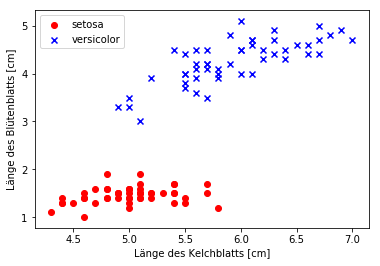

In [5]:
y = df.iloc[0:100, 4].values # Teile Datenset (erste 100 Werte) und erhalte 4. Spalte (Klasse)
y = np.where(y == 'Iris-setosa', -1, 1) # Setze Iris-setosa als Klasse -1 fest, alle anderen als 1
X = df.iloc[0:100, [0, 2]].values # Nehme erste 100 Merkmalsausprägungen
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa') # setosa ist in den ersten 50 datensätzen
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor') # versicolor ist in den zweiten 50 datensätzen
plt.xlabel('Länge des Kelchblatts [cm]')
plt.ylabel('Länge des Blütenblatts [cm]')
plt.legend(loc='upper left')
plt.show() # Zeige Diagramm

## EINGABEDATEN STANDARDISIEREN UND ENTSCHEIDUNGSGRENZE DES MODELLS PLOTTEN

In [6]:
# Standardisierung mithilfe des z-Wertes (x_i - x_mean) / std
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

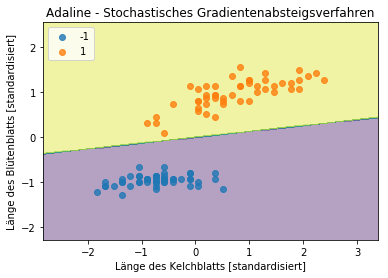

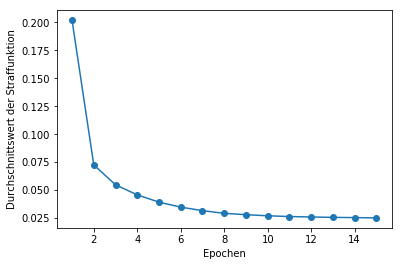

In [8]:
ada = AdalineGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastisches Gradientenabsteigsverfahren')
plt.xlabel('Länge des Kelchblatts [standardisiert]')
plt.ylabel('Länge des Blütenblatts [standardisiert]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochen')
plt.ylabel('Durchschnittswert der Straffunktion')
plt.show()

## KLASSE VORHERSAGEN NACHDEM MODELL ANGELERNT WURDE

In [9]:
print(ada.predict([6, 3]))

1
